In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

![구조](./imgs/aa.png)

**Core Modules API**
- 모델에 직접적으로 사용하는 함수들과 Dataset

**Model API**
- 모델을 구성할 때 필요한 API
- 내부에 Layer API를 호출하여 사용

**Layer API**
- 모델의 내부를 구성할 때 사용

## Layer API - Core Layer

![Layer](./imgs/layer.png)

## input 객체

- 딥러닝 모델의 입력을 정의할 때 사용
- 입력 데이터의 모양인 shape와 예상되는 데이터 유형인 dtype등을 포함

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [4]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_3')>

In [5]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

## Dense Layer

- 완전연결계층(Fully-Connected Layer)으로 노드수(유닛수)를 지정하면 생성
- [참고]("https://keras.io/api/layers/core_layers/dense/)

In [6]:
# 노드 수를 지정하면 됨
layers.Dense(10)

In [7]:
# 이름을 붙여서 각 Layer를 구분 가능
layers.Dense(10, name='layer1')

In [8]:
# Layer에 활성함수를 지정하여 사용하는 것이 가능
layers.Dense(10, activation='softmax')

In [9]:
# 이름 + 활성함수 지정 가능
layers.Dense(10, activation='relu', name='Dense Layer')

In [10]:
inputs = tf.random.uniform(shape=(5, 2))
# 5 x 2의 난수를 생성
print(inputs)

layer = layers.Dense(10, activation='relu')
# layer를 삽입. 노드는 10개, relu를 적용한 레이어

outputs = layer(inputs)
print("=========================WEIGHTS=========================================")
print(layer.weights)
print("==========================BIAS===========================================")
print(layer.bias)
print("==========================OUTPUTS========================================")
print(outputs)

tf.Tensor(
[[0.44414747 0.07712245]
 [0.27442527 0.00177753]
 [0.45863986 0.74146426]
 [0.24454093 0.9639143 ]
 [0.6885638  0.7678404 ]], shape=(5, 2), dtype=float32)
=========================WEIGHTS=========================================
[<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[-0.5482597 ,  0.54188687,  0.30531532,  0.25894386,  0.43044204,
         0.14708644,  0.41354972, -0.02408117,  0.67229754,  0.37583536],
       [ 0.55064756,  0.28833687,  0.5467072 ,  0.19352466,  0.60081464,
        -0.24648473,  0.4033726 ,  0.11932731, -0.38429293,  0.18889153]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
==========================BIAS===========================================
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
==========================OUTPUTS==========

2023-07-25 04:15:55.275513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Activation Layer

- 활성화함수는 이전 레이어의 결과값을 변환하여 다른 레이어로 전달하는 역할
- 크게 선형 활성화 함수와 비선형 활성화 함수로 구분
- 딥러닝에서는 선형 활성화 함수를 사용하면 다층 구조를 사용하는 의미가 없기 때문에 모델 표현력을 위해서 비선형 활성화 함수를 사용
- [참고]("https://keras.io/api/layers/activations/")

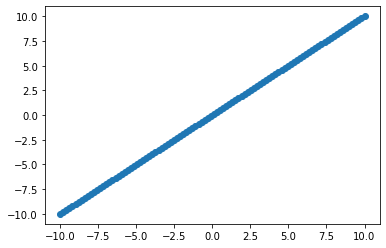

In [11]:
# Dense에서도 지정이 가능하지만, 따로 Activation layer를 만들어주기도 함
# Activation이 어떻게 작동하는지 알아보기 위해 -10부터 10 사이의 수 가운데 100개의 값을 입력으로 사용

import numpy as np
import matplotlib.pyplot as plt

input = np.linspace(-10, 10, 100)
x = np.linspace(-10, 10, 100)
plt.scatter(x, input)
plt.show()

### Sigmoid

- 주로 확률 예측 모델에 자주 사용, 출력값은 0과 1사이
- 0과 1사이에서 포화되는 문제가 발생
- 즉, 입력값이 작아도 출력값이 0 이하가 될 수 없고, 커져도 1 이상이 될 수 없음
- 그러기에 훈련이 오래걸리고, 기울기가 0에 가까워서 가중치 업데이트가 발생하지 않게 됨

![Sigmoid](./imgs/sigmoid.png)

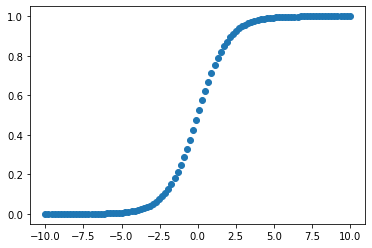

In [12]:
layer = layers.Activation('sigmoid')
output = layer(input)

plt.scatter(x, output)
plt.show()

### Hyperbolic tangent (tanh)

- 0을 중심으로 -1과 1 사이의 값이 나타남
- 일반적으로 시그모이드보다 빠르게 훈련됨
- 여전히 -1과 1사이 값으로 포화되는 문제

![tanh](./imgs/tanh.png)

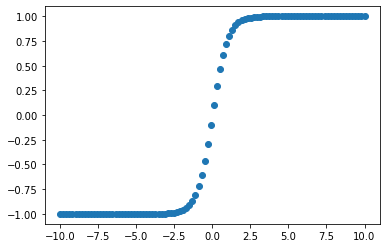

In [13]:
layer = layers.Activation('tanh')
output = layer(input)

plt.scatter(x, output)
plt.show()

### ReLU

- 출력값은 0부터 무한
- 하이퍼볼릭 탄젠트 함수보다 몇 배는 빠르게 훈련
- 함수 출력값은 0이 중심이 아니고, 학습률이 크면 ReLU를 사용한 노드에서 출력이 0이 됨

![ReLU](./imgs/ReLU.png)

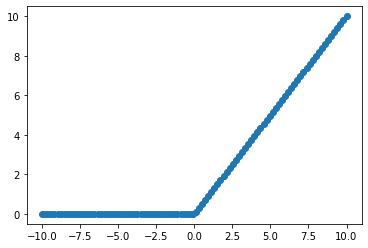

In [14]:
layer = layers.Activation('relu')
output = layer(input)

plt.scatter(x, output)
plt.show()

### Leaky ReLU

- ReLU에서 노트 출력이 0으로만 하던 문제를 해결
- 0이 아닌 아주 작은 음수값으로 출력

![LeakyReLU](./imgs/LeakyReLU.png)

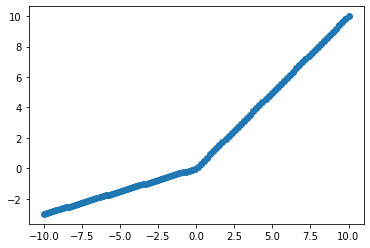

In [15]:
layer = layers.LeakyReLU()
output = layer(input)

plt.scatter(x, output)
plt.show()

### ELU 함수

- ReLU가 중심점이 0이 아니고, 노드 출력을 0으로만 하던 문제를 해결한 활성화 함수

![ELU](./imgs/ELU.png)

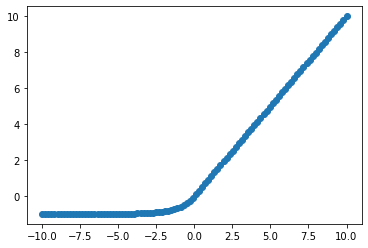

In [16]:
layer = layers.ELU()
output = layer(input)

plt.scatter(x, output)
plt.show()

## Flatten Layer

- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원 형태로 평평하게 변환

In [17]:
inputs = keras.Input(shape=(28, 28, 1))
layer = layers.Flatten(input_shape=(28, 28, 1))(inputs)
# 28 x 28 x 1 = 784
print(layer.shape)

(None, 784)


In [18]:
inputs = keras.Input(shape=(224, 224, 1))
# 224 x 224 x 1 = 50176
layer = layers.Flatten()(inputs)
print(layer.shape)

(None, 50176)


# Model API

In [19]:
from tensorflow.keras import models, utils

### Sequential API

- 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음
- Sequntial 객체 생성 후 .add()를 통해 레이어를 쌓음

In [20]:
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


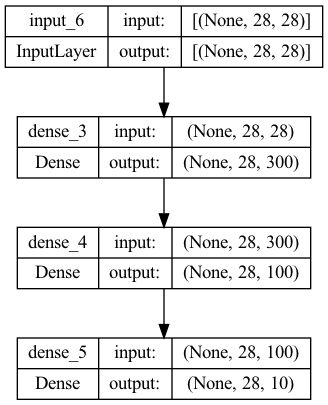

In [21]:
import pydot
utils.plot_model(model, show_shapes=True)

In [22]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


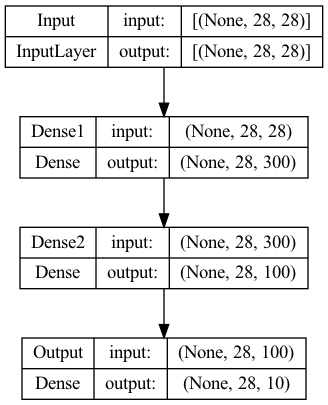

In [23]:
utils.plot_model(model, show_shapes=True)

### Functional API

- 모델 생성에 권장되는 방법
- 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능
- 다중 입출력을 다룰 수 있음

In [24]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


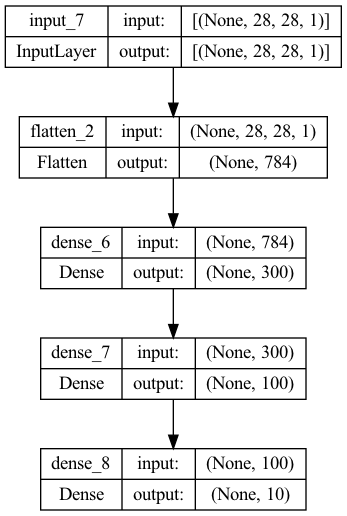

In [25]:
utils.plot_model(model, show_shapes=True)

In [26]:
# Functional API를 이용하여 input 객체를 여러 레이어에서 사용하기!

inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 28, 100)      2900        ['input_8[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 28, 30)       3030        ['dense_9[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_8[0][0]',                
                                                                  'dense_10[0][0]']         

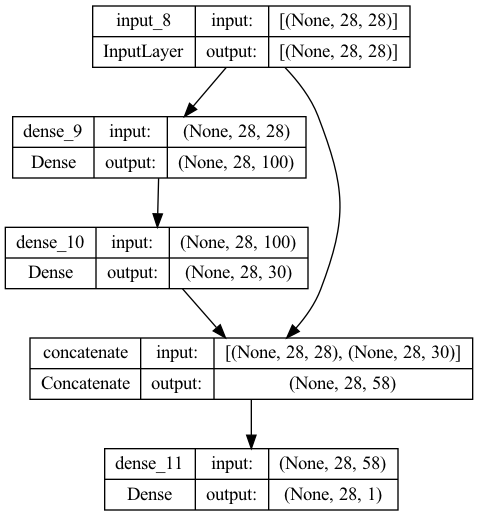

In [27]:
utils.plot_model(model, show_shapes=True)

In [28]:
# input을 여러 객체로 사용할 수 있음

input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10, 100)      2900        ['Input_2[0][0]']                
                                                                                                  
 Input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 10, 10)       1010        ['dense_12[0][0]']               
                                                                                            

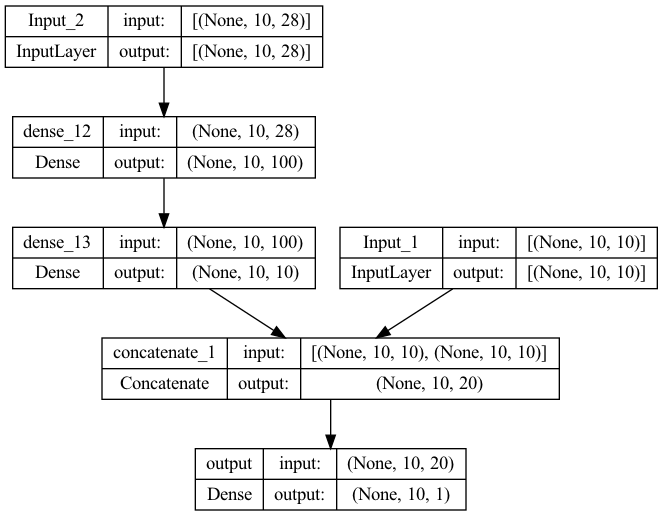

In [29]:
utils.plot_model(model, show_shapes=True)

In [30]:
# 결과를 여러개로 나눠서 사용이 가능

input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_15 (Dense)               (None, 10, 10)       1010        ['dense_14[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_15[0][0]']               
                                                                                            

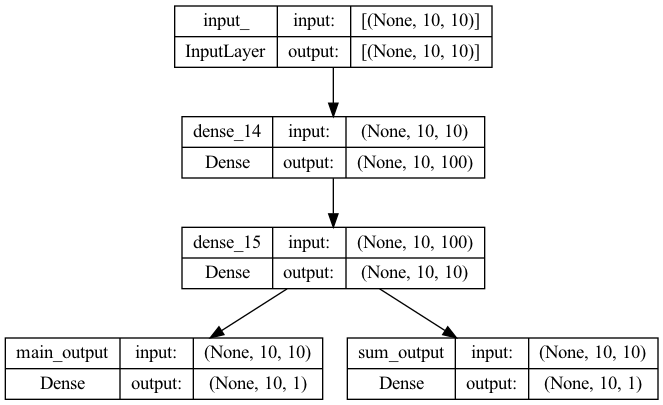

In [31]:
utils.plot_model(model, show_shapes=True)

In [32]:
# 다중입력과 다중출력이 가능한 모델도 만들 수 있음

input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 10)       1010        ['dense_16[0][0]']               
                                                                                            

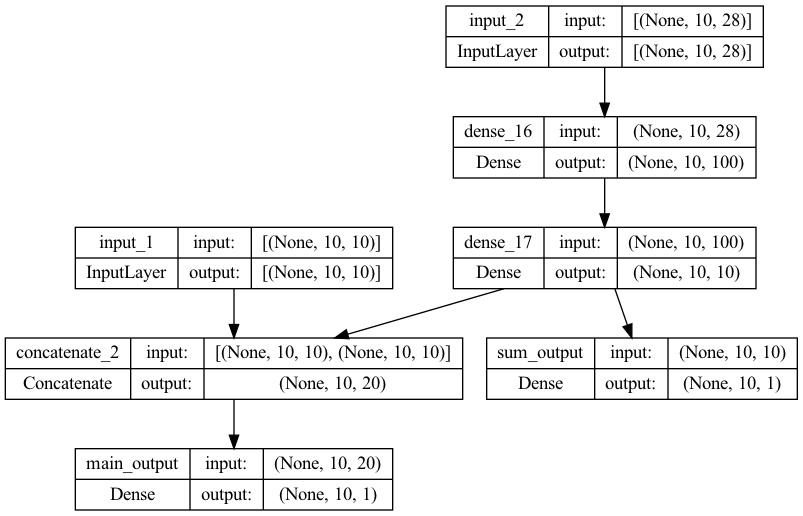

In [33]:
utils.plot_model(model, show_shapes=True)

### Subclassing API

- 커스터미이징에 최적화된 방법으로 Model 클래스를 상속받아서 사용
- Functional API로도 구현할 수 없는 모델들도 구현이 가능
- OOP에 익숙해야 함

- fit(): 모델 학습
- evaluate(): 모델 평가
- predict(): 모델 예측
- save(): 모델 저장
- load(): 모델 불러오기
- call(): 메소드안에서 원하는 계산 가능

In [34]:
# Subclassing API를 사용하면 Functional API로도 구현할 수 없는 모델들도 구현이 가능하지만
# 객체지향 프로그래밍(Object-oriented Programming)에 익숙해야함

# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

# Quiz

#### Q. 아래 주석을 따라 Seqential API 모델을 완성해 보세요.

In [35]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model.add(layers.Input(shape=(100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten(name="flatten_layer"))

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation='relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation='relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     (None, 30000)             0         
                                                                 
 dense_18 (Dense)            (None, 400)               12000400  
                                                                 
 dense_19 (Dense)            (None, 200)               80200     
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


#### Q. 아래 주석을 따라 Functional API 모델을 완성해 보세요.

In [36]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape=(100, 100, 3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_5"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_21 (Dense)            (None, 400)               12000400  
                                                                 
 dense_22 (Dense)            (None, 200)               80200     
                                                                 
 dense_23 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


#### Q. 아래 주석을 따라 Subclassing API 모델을 완성해 보세요.

In [37]:
class YourModel(models.Model):
    def __init__(self, **kwargs):
        super(YourModel, self).__init__(**kwargs)
        # Flatten 레이어를 쌓으세요.
        self.flat_layer = layers.Flatten(name="flatten_layer")

        # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer1 = layers.Dense(400, activation="relu")

        # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
        self.dense_layer2 = layers.Dense(200, activation="relu")

        # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
        self.output_layer = layers.Dense(100, activation="softmax")

    def call(self, inputs):
        # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
        x = self.flat_layer(inputs)
        x = self.dense_layer1(x)
        x = self.dense_layer2(x)
        x = self.output_layer(x)
        return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.expand_dims(data, 0)  # 데이터에 batch 차원을 추가합니다.

model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_layer (Flatten)     multiple                  0         
                                                                 
 dense_24 (Dense)            multiple                  12000400  
                                                                 
 dense_25 (Dense)            multiple                  80200     
                                                                 
 dense_26 (Dense)            multiple                  20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


### Q. Functional API

In [43]:
input_1 = keras.Input(shape=(None, 40), name='input_1')
hidden1 = layers.Dense(100, activation='relu', name = "dense_27")(input_1)

input_2 = keras.Input(shape=(None, 10), name='input_2')
hidden2 = layers.Dense(100, activation='relu', name = "dense_28")(input_2)

concat = layers.Concatenate(axis = 2)([hidden1, hidden2])

sub_out = layers.Dense(1, name='dense_29')(concat)
hidden3 = layers.Dense(40, activation='relu', name = "dense_30")(concat)
output = layers.Dense(10, activation='sigmoid', name='dense_31')(hidden3)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 40)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 10)]   0           []                               
                                                                                                  
 dense_27 (Dense)               (None, None, 100)    4100        ['input_1[0][0]']                
                                                                                                  
 dense_28 (Dense)               (None, None, 100)    1100        ['input_2[0][0]']                
                                                                                            

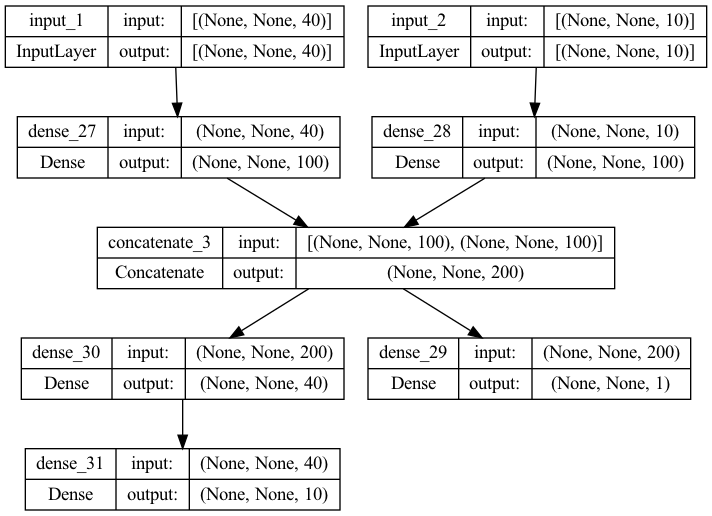

In [39]:
utils.plot_model(model, show_shapes=True)

### Q. Subclassing API

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models

class YourModel(models.Model):
    def __init__(self):
        super(YourModel, self).__init__()

        # 첫 번째 입력 레이어 정의 (shape=(None, 40))
        self.input_1 = layers.Input(shape=(None, 40), name='input_1')
        self.hidden1 = layers.Dense(100, activation='relu', name="dense_27")

        # 두 번째 입력 레이어 정의 (shape=(None, 10))
        self.input_2 = layers.Input(shape=(None, 10), name='input_2')
        self.hidden2 = layers.Dense(100, activation='relu', name="dense_28")

        # Concatenate 레이어를 사용하여 hidden1과 hidden2를 연결합니다. (출력 shape: (None, None, 200))
        self.concat = layers.Concatenate(axis=2)

        # sub_out 레이어 정의 (출력 shape: (None, None, 1))
        self.sub_out_layer = layers.Dense(1, name='dense_29')

        # hidden3 레이어 정의 (출력 shape: (None, None, 40))
        self.hidden3 = layers.Dense(40, activation='relu', name="dense_30")

        # output_layer 레이어 정의 (출력 shape: (None, None, 10))
        self.output_layer = layers.Dense(10, activation='sigmoid', name='dense_31')

    def call(self, inputs):
        # 모델의 출력을 계산하는 메서드를 정의합니다.
        # inputs는 리스트로 주어집니다. 각 요소는 모델의 입력에 해당합니다.
        input_1, input_2 = inputs

        # 모델의 계산 과정을 정의합니다.
        hidden1 = self.hidden1(input_1)
        hidden2 = self.hidden2(input_2)
        concat = self.concat([hidden1, hidden2])
        sub_out = self.sub_out_layer(concat)
        hidden3 = self.hidden3(concat)
        output = self.output_layer(hidden3)

        return [output, sub_out]

# 모델 생성
model = YourModel()

# 모델 빌드
model.build(input_shape=[(None, None, 40), (None, None, 10)])

# 모델 요약 정보 출력
model.summary()

Model: "your_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            multiple                  4100      
                                                                 
 dense_28 (Dense)            multiple                  1100      
                                                                 
 concatenate_4 (Concatenate)  multiple                 0         
                                                                 
 dense_29 (Dense)            multiple                  201       
                                                                 
 dense_30 (Dense)            multiple                  8040      
                                                                 
 dense_31 (Dense)            multiple                  410       
                                                                 
Total params: 13,851
Trainable params: 13,851
Non-trai

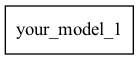

In [41]:
utils.plot_model(model, show_shapes=True)